In [94]:
import pickle
import glob
from prettytable import PrettyTable
import matplotlib.pyplot as plt
def load_data(filename):
    print("开始读取数据于：", filename)
    f = open(filename, 'rb')
    data = pickle.load(f)
    f.close()
    return data

def get_values(val_score):
    precision = [i["precision"] for i in val_score]
    recall = [i["recall"] for i in val_score]
    f_score = [i["f_score"] for i in val_score]
    ACC = [i["ACC"] for i in val_score]
    time = [i["time"] for i in val_score]
    return [precision, recall, f_score, ACC, time]

def get_values_both(train_core, val_score):
    train_values = get_values(train_core)
    val_values = get_values(val_score)
    result = []
    for i in range(len(train_values)):
        result.append([train_values[i], val_values[i]])
    return result

def show_table(filename):
    fold_result_dict = {}
    fold_result_dict = load_data(filename)
    train_table = PrettyTable(['typ', 'epo', 'loss', 'precision','recall', 'f_score', 'ACC', 'time'])
    test_table = PrettyTable(['typ', 'epo', 'loss', 'precision','recall', 'f_score', 'ACC', 'time'])
    # train_table = PrettyTable(['typ', 'epo', 'loss', 'pre_0','precision', 'rec_0', 'recall',  'f_0', 'f_score', 'ACC', 'time'])
    # test_table = PrettyTable(['typ', 'epo', 'loss', 'pre_0','precision', 'rec_0', 'recall',  'f_0', 'f_score', 'ACC', 'time'])
    # train_table = PrettyTable(['typ', 'epo', 'loss', 'pre_0','precision', 'rec_0', 'recall',  'f_0', 'f_score', 'ACC', 'time',"macro_f1"])
    # test_table = PrettyTable(['typ', 'epo', 'loss', 'pre_0','precision', 'rec_0', 'recall',  'f_0', 'f_score', 'ACC', 'time',"macro_f1"])
    
    for i in fold_result_dict:
        train_table.add_row(["tra", str(i+1), format(fold_result_dict[i]["train_loss"], '.4f')] + \
            # [fold_result_dict[i]["train_score"][j] for j in fold_result_dict[i]["train_score"] if j != "report_dict"] + [str(fold_result_dict[i]["train_score"]["report_dict"]["macro avg"]["f1-score"])])
            [fold_result_dict[i]["train_score"][j] for j in fold_result_dict[i]["train_score"] if j != "report_dict"])
        test_table.add_row(["val", str(i+1), format(fold_result_dict[i]["val_loss"], '.4f')] + \
            # [fold_result_dict[i]["val_score"][j] for j in fold_result_dict[i]["val_score"] if j != "report_dict"]+ [str(fold_result_dict[i]["val_score"]["report_dict"]["macro avg"]["f1-score"])])
            [fold_result_dict[i]["val_score"][j] for j in fold_result_dict[i]["val_score"] if j != "report_dict"])
        # if i == 39: break
    max_mf1 =  max([float(fold_result_dict[i]["val_score"]["f_score"]) for i in fold_result_dict])
    mean_mf1 =  sum([float(fold_result_dict[i]["val_score"]["f_score"]) for i in fold_result_dict][-3:])/3
    print(filename)
    # print(train_table)
    print(test_table)
    print("max_f1:", max_mf1)
    print("max_3_mean_f1:", mean_mf1)
    return max_mf1, mean_mf1

def show_table_more(filename):
    fold_result_dict = {}
    fold_result_dict = load_data(filename)
    train_table = PrettyTable(['typ', 'epo', 'loss', 'pre_0','precision', 'rec_0', 'recall',  'f_0', 'f_score', "ROC", 'ACC', 'time',"macro_f1"])
    test_table = PrettyTable(['typ', 'epo', 'loss', 'pre_0','precision', 'rec_0', 'recall',  'f_0', 'f_score', "ROC", 'ACC', 'time',"macro_f1"])
    
    for i in fold_result_dict:
        train_table.add_row(["tra", str(i+1), format(fold_result_dict[i]["train_loss"], '.4f')] + \
            [fold_result_dict[i]["train_score"][j] for j in fold_result_dict[i]["train_score"] if j != "report_dict"] + [str(fold_result_dict[i]["train_score"]["report_dict"]["macro avg"]["f1-score"])])
        test_table.add_row(["val", str(i+1), format(fold_result_dict[i]["val_loss"], '.4f')] + \
            [fold_result_dict[i]["val_score"][j] for j in fold_result_dict[i]["val_score"] if j != "report_dict"]+ [str(fold_result_dict[i]["val_score"]["report_dict"]["macro avg"]["f1-score"])])
    # max_roc =  max([float(fold_result_dict[i]["val_score"]["ROC"]) for i in fold_result_dict])
    # max_mf1 =  max([float(fold_result_dict[i]["val_score"]["f_score"]) for i in fold_result_dict])
    # mean_mf1 =  sum([float(fold_result_dict[i]["val_score"]["f_score"]) for i in fold_result_dict][-3:])/3
    max_mf1 = 0
    max_roc = 0
    index_num = 0
    best_result_model = filename.split("/")[-1].rstrip(".result").replace("_epo50", "") + "_epo0.pt"
    for i in fold_result_dict:
        if float(fold_result_dict[i]["val_score"]["ROC"]) > max_roc and float(fold_result_dict[i]["val_score"]["f_score"]) > max_mf1:
            max_mf1 = float(fold_result_dict[i]["val_score"]["f_score"])
            max_roc = float(fold_result_dict[i]["val_score"]["ROC"])
            best_result_model = filename.split("/")[-1].rstrip(".result").replace("_epo50", "") + "_epo" + str(i) + ".pt"
            index_num = i
    # print(filename)
    # print(train_table)
    print(test_table)
    print(test_table[index_num])
    print("max_f1:", max_mf1)
    print("max_roc:", max_roc)
    print("best_result_model:", best_result_model)
    return (max_roc, best_result_model)
    # print("max_3_mean_f1:", mean_mf1)
    # return max_mf1, mean_mf1

def draw(score, x, x_start, x_end, value_dict):
    for i, value  in enumerate(get_values(score)):
        value = [float(i) for i in value]
        plt.plot(x, value, label='-' + value_dict[i])
        plt.xlim(x_start, x_end)
        plt.ylabel("testing accuracy %")
        plt.xlabel("epoch (iter. over training set)")
        plt.legend(loc="lower right", fontsize='small', ncol=2,)
        plt.show()
        
def draw_train_and_test(train_score, val_score, x, x_start, x_end, value_dict):
    for i, value  in enumerate(get_values_both(train_score, val_score)):
        value_train = [float(i) for i in value[0]]
        value_val = [float(i) for i in value[1]]
        plt.plot(x, value_train, label='-train-' + value_dict[i])
        plt.plot(x, value_val, label='-val-' + value_dict[i])
        plt.xlim(x_start, x_end)
        plt.ylabel("testing accuracy %")
        plt.xlabel("epoch (iter. over training set)")
        plt.legend(loc="lower right", fontsize='small', ncol=2,)
        plt.show()

def draw_table(filename):
    value_dict = ['precision', 'recall', 'f_score', 'ACC', 'time']
    x_start = 0
    step = 1
    fold_result_dict = {}
    fold_result_dict = load_data(filename)

    x_end = x_start + step * len(fold_result_dict)
    x = range(x_start,x_end,step)
    # x = range(10,x_end,step)
    # x = range(40,x_end,step)

    train_loss = [fold_result_dict[i]['train_loss'] for i in x]
    val_loss = [fold_result_dict[i]['val_loss'] for i in x]
    plt.figure()
    plt.plot(x, train_loss, label='-train_loss')
    plt.plot(x, val_loss, label='-val_loss')
    plt.xlim(x_start, x_end)
    plt.ylabel("testing accuracy %")
    plt.xlabel("epoch (iter. over training set)")
    plt.legend(loc="lower right", fontsize='small', ncol=2,)
    plt.show()
    
    train_score = [fold_result_dict[i]['train_score'] for i in x]
    val_score = [fold_result_dict[i]['val_score'] for i in x]
    draw_train_and_test(train_score, val_score, x, x_start, x_end, value_dict)
    # draw(train_score, x, x_start, x_end, value_dict)
    # draw(val_score, x, x_start, x_end, value_dict)
def evaluate(pathname):
    # show_table(pathname)
    show_table_more(pathname)
    
    # draw_table(pathname)


In [84]:
import os
for resu in ["result_one"]:
# for root in ["result", "result_one", "result_binary"]:
    # for model in ["GRU"]:
    all_best_result_dict = {}
    for model in [ "TextCNN"]:
    # for model in ["bert", "codebert", "LSTM", "GRU", "TextCNN", "astgru"]:
    # for model in ["bert", "codebert", "vulcnn", "astgru", "LSTM", "GRU", "TextCNN", "devign", "reveal", "vulroberta", "code2vec"]:
    # for model in ["bert", "codebert", "vulcnn", "astgru", "LSTM", "GRU", "TextCNN", "vulroberta", "code2vec"]:
        for dataset in ["sub_original_dataset"]:
            root = "/root/data/qm_data/issta2022/" + resu+ "/" + model + "/" + dataset + "/"
            best_result_dict = {}
            for dir in ["ffmpeg", "qemu", "reveal"]:
                print("===== ", model, " || ", dir, " =====")
                max_tem = 0
                for file in sorted(glob.glob(root + dir + "/*.result")):
                    max_f1, model_name = show_table_more(file)
                    if max_f1 > max_tem or best_result_dict == {}:
                        best_result_dict[dir] = model_name
                        max_tem = max_f1
                    print("\n")
                    # evaluate(file)
                print("*" * 20)
                print("\n"*4)
            # print(best_result_dict)
        all_best_result_dict[model] = best_result_dict
    print(all_best_result_dict)
        

=====  TextCNN  ||  ffmpeg  =====
开始读取数据于： /root/data/qm_data/issta2022/result_one/TextCNN/sub_original_dataset/ffmpeg/0_epo50_bat128_dim768_lr0.002.result
+-----+-----+--------+--------+-----------+--------+--------+--------+---------+--------+--------+-------+---------------------+
| typ | epo |  loss  | pre_0  | precision | rec_0  | recall |  f_0   | f_score |  ROC   |  ACC   |  time |       macro_f1      |
+-----+-----+--------+--------+-----------+--------+--------+--------+---------+--------+--------+-------+---------------------+
| val |  1  | 0.6932 | 53.531 |   54.647  | 49.061 | 59.036 | 51.198 |  56.757 | 54.048 | 54.145 | 0.789 |  0.5397750691868339 |
| val |  2  | 0.6842 | 58.605 |   53.675  | 26.305 | 82.129 | 36.311 |  64.921 | 54.217 | 54.759 | 0.794 |  0.5061593705685924 |
| val |  3  | 0.6810 | 60.563 |   55.700  | 35.908 | 77.510 | 45.085 |  64.819 | 56.709 | 57.114 | 0.800 |  0.5495233473418485 |
| val |  4  | 0.6802 | 57.413 |   55.000  | 37.996 | 72.892 | 45.729 |

In [142]:
import pandas
# pandas.set_option('display.max_colwidth', 60)
# 读取最终结果的
pd = load_data("/root/data/qm_data/issta2022/result/all_result.pkl")
# pd.TextCNN_ffmpeg["ori_ffmpeg"]
# pd.TextCNN_ffmpeg["ori_ffmpeg"].keys()
# pd.TextCNN_ffmpeg["ori_ffmpeg"]["report_dict"]["accuracy"]
# pd.TextCNN_ffmpeg["ori_ffmpeg"]["report_dict"].keys()
# pd.TextCNN_ffmpeg["ori_ffmpeg"]["report_dict"]["true_dict"]
# pd.TextCNN_ffmpeg["mut_ffmpeg"]["report_dict"]["true_dict"]
# pd.TextCNN_ffmpeg["ori_ffmpeg"]["report_dict"]["false_dict"]
# pd[["TextCNN_ffmpeg", "TextCNN_qemu", "TextCNN_reveal"]]
# pd.columns
# pd.index
pd["Code2vec_ffmpeg"]["mut_ffmpeg"]["report_dict"]

开始读取数据于： /root/data/qm_data/issta2022/result/all_result.pkl


{'2': {'precision': 0.5191524604872662,
  'recall': 0.5474526928675401,
  'f1-score': 0.5329271316731021,
  'support': 13740},
 '3': {'precision': 0.4900352661363077,
  'recall': 0.461675166125792,
  'f1-score': 0.4754326636164711,
  'support': 12942},
 'accuracy': 0.5058466381830448,
 'macro avg': {'precision': 0.5045938633117869,
  'recall': 0.5045639294966661,
  'f1-score': 0.5041798976447867,
  'support': 26682},
 'weighted avg': {'precision': 0.5050292789682607,
  'recall': 0.5058466381830448,
  'f1-score': 0.5050396642572818,
  'support': 26682},
 'true_dict': ['1_FFmpeg_9171_1.c',
  '1_FFmpeg_6576_3.c',
  '1_FFmpeg_9567_1.c',
  '1_FFmpeg_7761_2.c',
  '0_FFmpeg_4369_1.c',
  '0_FFmpeg_1225_2.c',
  '0_FFmpeg_2363_7.c',
  '0_FFmpeg_3727_1.c',
  '1_FFmpeg_7717_1.c',
  '0_FFmpeg_563_1.c',
  '1_FFmpeg_5406_4.c',
  '0_FFmpeg_1928_2.c',
  '0_FFmpeg_3200_6.c',
  '0_FFmpeg_3176_4.c',
  '1_FFmpeg_9491_9.c',
  '1_FFmpeg_9473_5.c',
  '1_FFmpeg_7665_1.c',
  '0_FFmpeg_1225_4.c',
  '1_FFmpeg_593

In [73]:
# RQ1表格
# pd.applymap(lambda x: [x["precision"],x["recall"],x["f_score"]])
# pd.applymap(lambda x: [x["precision"],x["recall"],x["f_score"]])[["CodeBert_ffmpeg","VulCNN_ffmpeg","Astgru_ffmpeg","LSTM_ffmpeg","GRU_ffmpeg","TextCNN_ffmpeg","Devign_ffmpeg", "Reveal_ffmpeg"]]
# pd.applymap(lambda x: [x["precision"],x["recall"],x["f_score"]])[["CodeBert_qemu","VulCNN_qemu","Astgru_qemu","LSTM_qemu","GRU_qemu","TextCNN_qemu", "Devign_qemu", "Reveal_qemu"]]
# pd.applymap(lambda x: [x["precision"],x["recall"],x["f_score"]])[["CodeBert_reveal", "VulCNN_reveal", "Astgru_reveal", "LSTM_reveal", "GRU_reveal", "TextCNN_reveal", "Devign_reveal", "Reveal_reveal"]]

# shunxu_list = ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Bert","CodeBert","VulRoberta"]
shunxu_list = ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Devign","Reveal","Bert","CodeBert","VulRoberta"]
aa = pandas.DataFrame()
for the_name in ["ffmpeg", "qemu", "reveal"]:
    for metirc in ["f_score", "precision", "recall"]:
        bb = pd.applymap(lambda x: x[metirc])[[i+"_"+the_name for i in shunxu_list]].loc[["ori_"+the_name]]
        bb.columns = shunxu_list
        aa = pandas.concat([aa, bb], axis=0, ignore_index=True)
aa

,TextCNN,LSTM,GRU,Code2vec,Astgru,VulCNN,Devign,Reveal,Bert,CodeBert,VulRoberta
0,67.389,56.651,60.346,47.796,60.021,68.229,68.346,0.952,43.468,69.225,73.456
1,57.632,54.113,55.259,56.093,57.971,56.792,52.720,100.000,53.198,57.503,62.857
2,81.124,59.438,66.466,41.637,62.222,85.435,97.136,0.478,36.747,86.948,88.353
3,68.012,34.775,64.324,58.183,16.497,82.849,35.919,60.551,34.116,64.417,84.511
4,59.777,46.035,48.505,44.499,40.782,88.372,55.592,43.422,52.500,50.377,78.753
5,78.877,27.941,95.455,84.021,10.340,77.975,26.531,100.000,25.267,89.305,91.176
6,46.089,44.321,35.930,14.356,26.570,38.247,11.480,7.670,27.357,45.043,61.633
7,31.977,30.651,23.993,12.293,23.404,65.753,10.857,7.104,18.626,29.822,44.543
8,82.500,80.000,71.500,17.252,30.726,26.966,12.179,8.333,51.500,92.000,100.000


In [90]:
# RQ2表格
shunxu_list = ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Devign","Reveal","Bert","CodeBert","VulRoberta"]
aa = pandas.DataFrame()
metirc = "precision"
for the_name in ["ffmpeg", "qemu", "reveal"]:
    for the_name_dataset in ["ffmpeg", "qemu", "reveal"]:
        if the_name == the_name_dataset: continue
        bb = pd.applymap(lambda x: x[metirc])[[i+"_"+the_name for i in shunxu_list]].loc[["ori_"+the_name_dataset]]
        bb.columns = shunxu_list
        aa = pandas.concat([aa, bb], axis=0, ignore_index=True)
aa

#preci辨别漏洞的能力
#检测漏洞的能力，查全
# max_f1放在git

#分布不一样之后，所有检测的精确度都下降了  
# code2vec小一点

# 虽然保留了语义，分布不一样
# 哪一个表征更低
# 不管是哪个,都会降低到一个平均水平
# 几乎都是在猜,都差

# 均衡数据集和不均衡数据集

,TextCNN,LSTM,GRU,Code2vec,Astgru,VulCNN,Devign,Reveal,Bert,CodeBert,VulRoberta
0,44.700,44.307,44.519,57.316,43.015,43.256,42.914,42.686,45.431,43.467,44.704
1,12.242,18.944,17.265,91.250,15.046,10.658,9.913,5.556,18.407,10.802,12.981
2,52.117,52.576,51.128,50.746,51.158,52.439,53.224,51.427,53.288,51.640,54.665
3,9.699,18.907,9.137,10.186,24.218,11.205,11.448,9.878,16.930,10.282,12.823
4,52.607,53.629,52.020,52.343,52.630,48.842,52.815,52.662,53.429,53.090,54.019
5,45.867,43.829,44.861,44.955,40.777,46.776,39.783,43.013,44.188,46.764,46.008


In [91]:
# RQ2表格
shunxu_list = ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Devign","Reveal","Bert","CodeBert","VulRoberta"]
aa = pandas.DataFrame()
metirc = "recall"
for the_name in ["ffmpeg", "qemu", "reveal"]:
    for the_name_dataset in ["ffmpeg", "qemu", "reveal"]:
        if the_name == the_name_dataset: continue
        bb = pd.applymap(lambda x: x[metirc])[[i+"_"+the_name for i in shunxu_list]].loc[["ori_"+the_name_dataset]]
        bb.columns = shunxu_list
        aa = pandas.concat([aa, bb], axis=0, ignore_index=True)
aa
# 查全的结论
# devign reveal 48,47左右
# codebert小
# vulbert高
# VulRoberta pretrain最好
# 泛化能力更好,因为数据集更多
# codebert比其他更好, 语料库多语言,更丰富的语料库
# 有更多的数据集支撑语料库

# graph-based比其他两个更好点,语义信息更多,泛化能力更强
# 训练的数据集太少了,前期训练的时候给的知识太少了

,TextCNN,LSTM,GRU,Code2vec,Astgru,VulCNN,Devign,Reveal,Bert,CodeBert,VulRoberta
0,45.675,26.434,25.846,57.532,27.159,49.137,94.813,2.824,18.545,66.627,55.475
1,53.453,54.955,60.210,53.628,44.057,60.724,93.999,0.316,38.989,71.421,60.911
2,61.089,59.040,89.654,17.837,38.449,33.630,26.593,100.000,41.342,86.681,60.968
3,52.653,56.456,89.590,69.112,34.218,7.409,24.826,99.874,37.487,86.587,58.559
4,51.487,45.721,60.526,13.297,36.415,5.496,11.028,12.794,64.644,52.290,30.374
5,18.920,17.235,26.554,9.965,10.033,5.908,10.470,12.550,24.549,23.185,7.474


In [14]:
pd.applymap(lambda x: x["recall"])[[i+"_"+the_name for i in shunxu_list]]

,TextCNN_reveal,LSTM_reveal,GRU_reveal,Code2vec_reveal,Astgru_reveal,VulCNN_reveal,Devign_reveal,Reveal_reveal,Bert_reveal,CodeBert_reveal,VulRoberta_reveal
ori_ffmpeg,51.487,45.721,60.526,13.297,36.415,5.496,11.028,12.794,64.644,52.290,30.374
mut_ffmpeg,54.949,58.627,74.224,14.956,63.123,2.729,11.563,12.838,85.136,70.338,53.473
ori_qemu,18.920,17.235,26.554,9.965,10.033,5.908,10.470,12.550,24.549,23.185,7.474
mut_qemu,25.442,34.297,49.455,10.442,41.128,0.853,11.128,12.333,55.365,42.939,25.442
ori_reveal,82.500,80.000,71.500,17.252,30.726,26.966,12.179,8.333,51.500,92.000,100.000
mut_reveal,85.072,78.725,78.201,15.546,67.570,12.367,13.531,13.156,80.408,93.350,99.531


In [15]:
pd.applymap(lambda x: x["precision"])[[i+"_"+the_name for i in shunxu_list]]

,TextCNN_reveal,LSTM_reveal,GRU_reveal,Code2vec_reveal,Astgru_reveal,VulCNN_reveal,Devign_reveal,Reveal_reveal,Bert_reveal,CodeBert_reveal,VulRoberta_reveal
ori_ffmpeg,52.607,53.629,52.020,52.343,52.630,48.842,52.815,52.662,53.429,53.090,54.019
mut_ffmpeg,52.134,51.836,51.151,53.073,53.110,49.573,50.977,52.407,52.042,52.540,52.339
ori_qemu,45.867,43.829,44.861,44.955,40.777,46.776,39.783,43.013,44.188,46.764,46.008
mut_qemu,44.657,42.594,41.448,45.124,40.381,40.000,42.045,40.196,43.183,45.412,44.227
ori_reveal,31.977,30.651,23.993,12.293,23.404,65.753,10.857,7.104,18.626,29.822,44.543
mut_reveal,35.983,30.377,28.577,19.419,28.256,57.123,25.573,19.698,24.405,30.604,42.621


In [153]:
# 混淆结果测试
# 存在false里面有但是true没有的情况
def get_score(the_true_dict, the_false_dict):
    pre = []
    lab = []
    from model.score import get_MCM_score
    from sklearn.metrics import classification_report
    for tt in the_true_dict:
        pre.append(int(tt[0]))
        lab.append(int(tt[0]))
    for tt in the_false_dict:
        pre.append(int(tt[0]))
        lab.append(1 - int(tt[0]))
    # get_MCM_score(lab, pre)
    # print(classification_report(lab, pre, output_dict = True)["accuracy"])
    try:
        return classification_report(lab, pre, output_dict = True)["1"]["f1-score"]
        # print(classification_report(lab, pre, output_dict = True)["1"]["f1-score"])
    except:
        return 0
        # print(classification_report(lab, pre, output_dict = True))
    # return classification_report(lab, pre, output_dict = True)["1"]["f1-score"]
    
        
def get_mut_dict(model_name, dataset_name):
    true_dict_ori = pd.applymap(lambda x: x["report_dict"]["true_dict"])[model_name]["ori_" + dataset_name]
    false_dict_ori = pd.applymap(lambda x: x["report_dict"]["false_dict"])[model_name]["ori_" + dataset_name]
    true_dict_mut = pd.applymap(lambda x: x["report_dict"]["true_dict"])[model_name]["mut_" + dataset_name]
    false_dict_mut = pd.applymap(lambda x: x["report_dict"]["false_dict"])[model_name]["mut_" + dataset_name]
    true_dict_ori = [i.strip(".c") for i in true_dict_ori]
    false_dict_ori = [i.strip(".c") for i in false_dict_ori]
    true_dict_mut = [i.strip(".c") for i in true_dict_mut]
    false_dict_mut = [i.strip(".c") for i in false_dict_mut]
    mut_dict_key = list(set(sorted([int(i.split("_")[-1]) for i in true_dict_mut + false_dict_mut])))
    final_dict = {}
    for key in mut_dict_key:
        tm = [i for i in true_dict_mut if int(i.split("_")[-1]) == key]
        fm = [i for i in false_dict_mut if int(i.split("_")[-1]) == key]
        set_tm = list(set(["_".join(i.split("_")[:-1]) for i in tm]))
        set_fm = list(set(["_".join(i.split("_")[:-1]) for i in fm]))
        set_tfm = list(set(set_tm + set_fm))
        to = [i for i in true_dict_ori if i in set_tfm]
        fo = [i for i in false_dict_ori if i in set_tfm]        
        
        # print(final_dict)
        # print(model_name, dataset_name, key, "\nto:", len(to), "\nfo:", len(fo), "\ntm:", len(tm), "\nfm:", len(fm)) 
        # print("\nacc\n-----ori")
        # get_score(to, fo)
        # print("-----mut")
        # get_score(tm, fm)
        # print("="*100, "\n")
        if model_name + "_ori" not in final_dict: final_dict[model_name + "_ori"] = {}
        if model_name + "_mut" not in final_dict: final_dict[model_name + "_mut"] = {}
        final_dict[model_name + "_ori"][key] = get_score(to, fo)
        final_dict[model_name + "_mut"][key] = get_score(tm, fm)
    return final_dict
# for model_name in pd.columns:
import warnings
warnings.filterwarnings("ignore")
import pandas
pd = load_data("/root/data/qm_data/issta2022/result/all_result.pkl")
final_all_dict = {}
# for dataset_name in ["ffmpeg", "qemu"]:
for dataset_name in ["ffmpeg", "qemu", "reveal"]:
    final_dict = {}
    # for model_name in ["Code2vec"]:
    for model_name in ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Devign","Reveal","Bert","CodeBert","VulRoberta"]:
        model_name = model_name + "_" + dataset_name
        print(model_name)
        final_dict = dict(final_dict, **get_mut_dict(model_name, dataset_name))
    final_dict = pandas.DataFrame(final_dict)
    final_all_dict[dataset_name] = final_dict[:20]

开始读取数据于： /root/data/qm_data/issta2022/result/all_result.pkl
TextCNN_ffmpeg
LSTM_ffmpeg
GRU_ffmpeg
Code2vec_ffmpeg
Astgru_ffmpeg
VulCNN_ffmpeg
Devign_ffmpeg
Reveal_ffmpeg
Bert_ffmpeg
CodeBert_ffmpeg
VulRoberta_ffmpeg
TextCNN_qemu
LSTM_qemu
GRU_qemu
Code2vec_qemu
Astgru_qemu
VulCNN_qemu
Devign_qemu
Reveal_qemu
Bert_qemu
CodeBert_qemu
VulRoberta_qemu
TextCNN_reveal
LSTM_reveal
GRU_reveal
Code2vec_reveal
Astgru_reveal
VulCNN_reveal
Devign_reveal
Reveal_reveal
Bert_reveal
CodeBert_reveal
VulRoberta_reveal


In [154]:
# final_all_dict["ffmpeg"]["Reveal_ffmpeg_mut"]
# final_all_dict["qemu"]["Reveal_qemu_mut"]
final_all_dict["ffmpeg"]["Reveal_ffmpeg_mut"] = final_all_dict["qemu"]["Reveal_qemu_mut"]

In [163]:
import seaborn as sns
import pandas
import matplotlib.pyplot as plt
def draw_pic(final_all_dict, selected_dataset):
    final_dict_draw = final_all_dict[selected_dataset][ [i for i in final_all_dict[selected_dataset].columns if "_mut" in i]]
    num = 20
    sns.set(context='notebook', style='Set3', palette='deep', font_scale=1.3, color_codes=True)
    # sns.set(context='notebook', palette="Set3",style='ticks', font_scale=1.3)
    plt.figure(dpi=300,figsize=(24,8))
    plt.xticks(final_dict_draw[:num].index,fontsize=10) # 改变文字大小参数-fontsize
    p = sns.lineplot(data=final_dict_draw[:num])
    plt.legend(bbox_to_anchor=(0.5, 1), loc=8, borderaxespad=0.3, ncol=6)
    p.set_xlabel("Generation Numbers of Mutations")
    p.set_ylabel("F1-Score")
    # p = p.get_figure()
    # p.savefig("./save/pic/overall_crossdown-performance.pdf",dpi = 800, facecolor = "w", bbox_inches = 'tight')


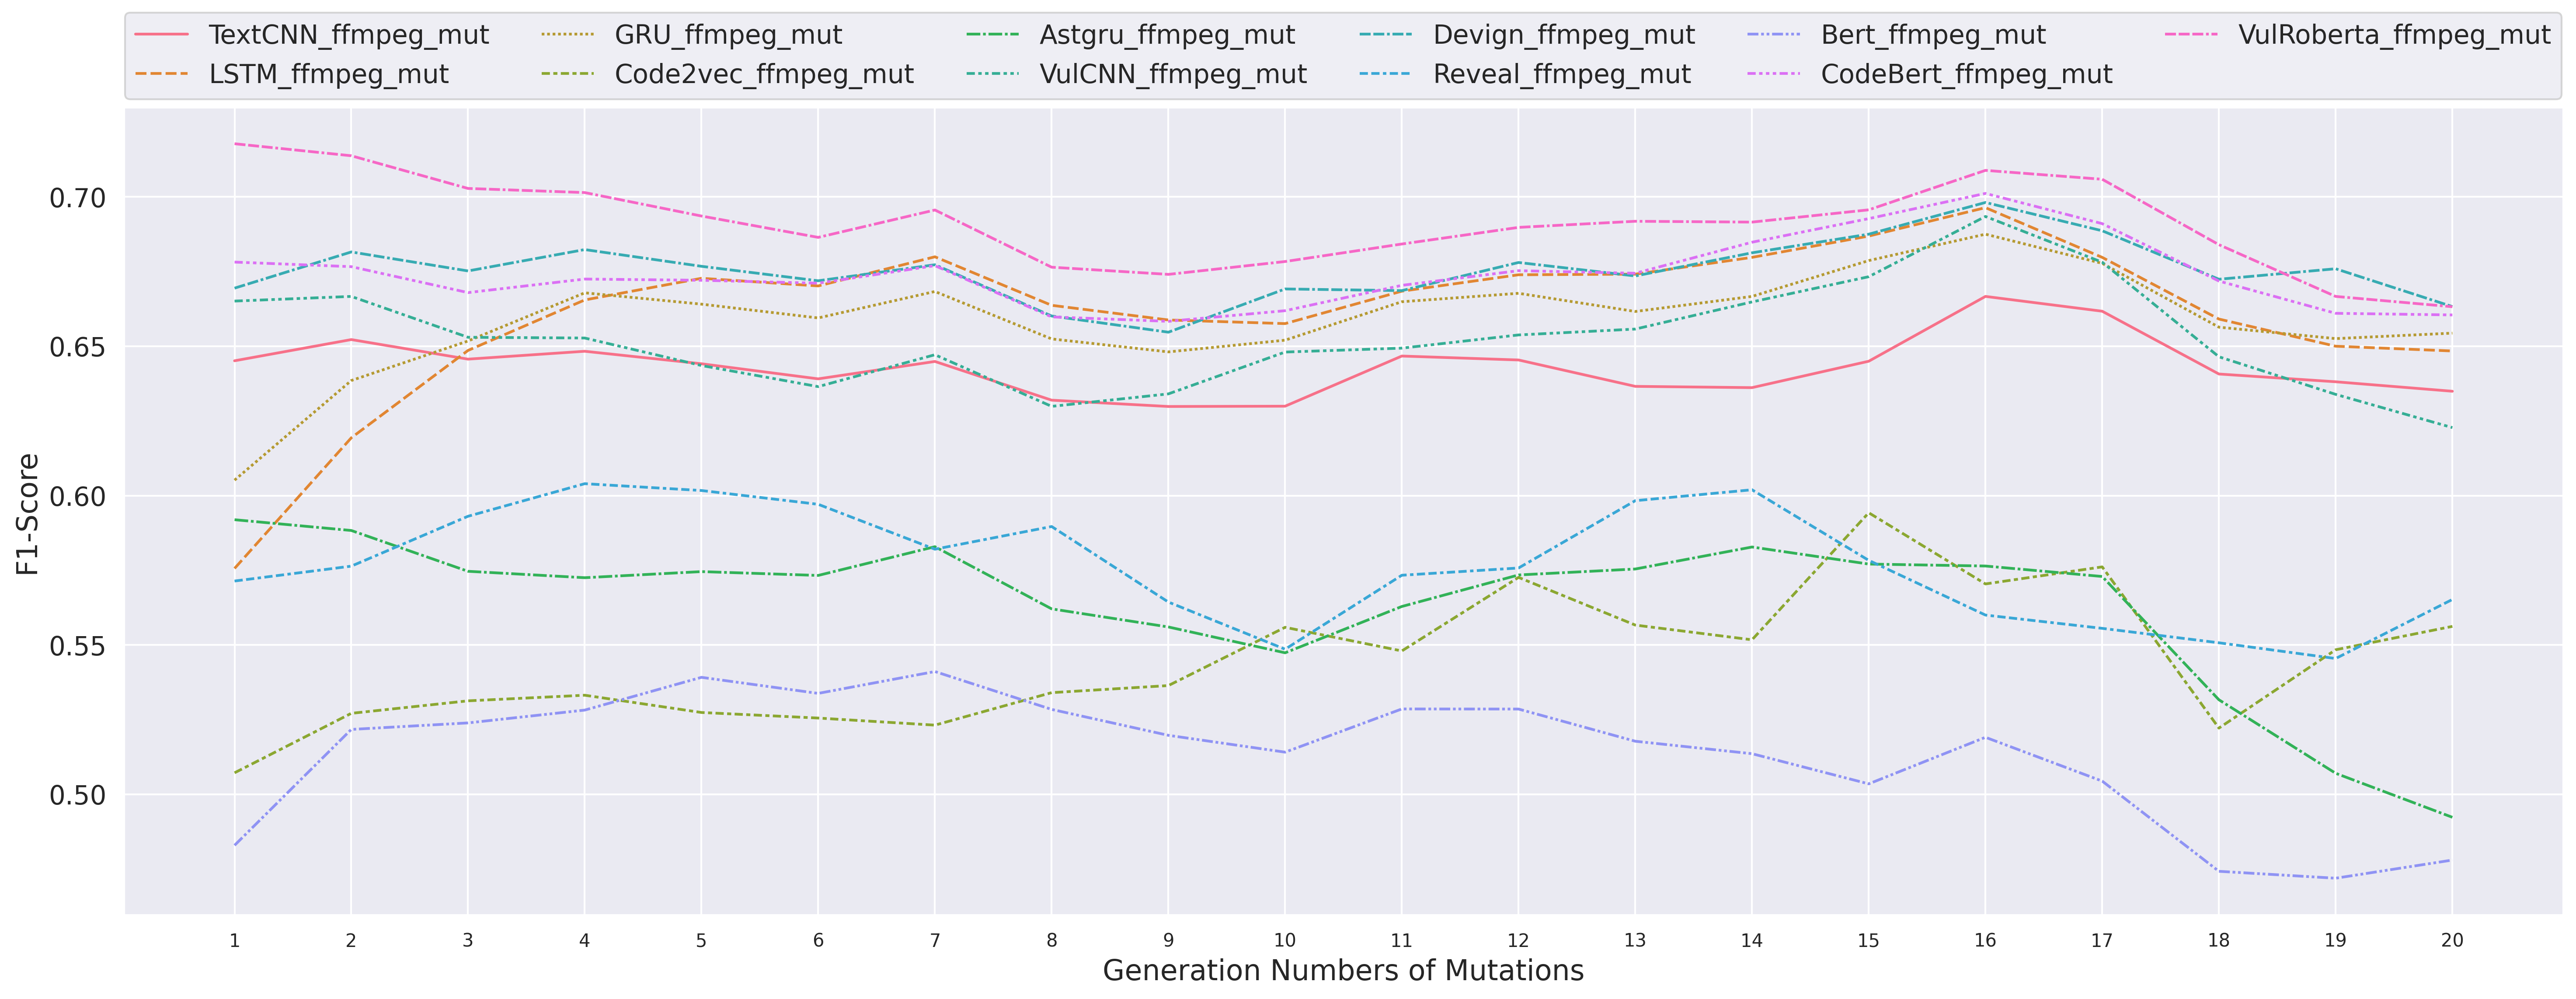

In [162]:
draw_pic(final_all_dict, "ffmpeg")

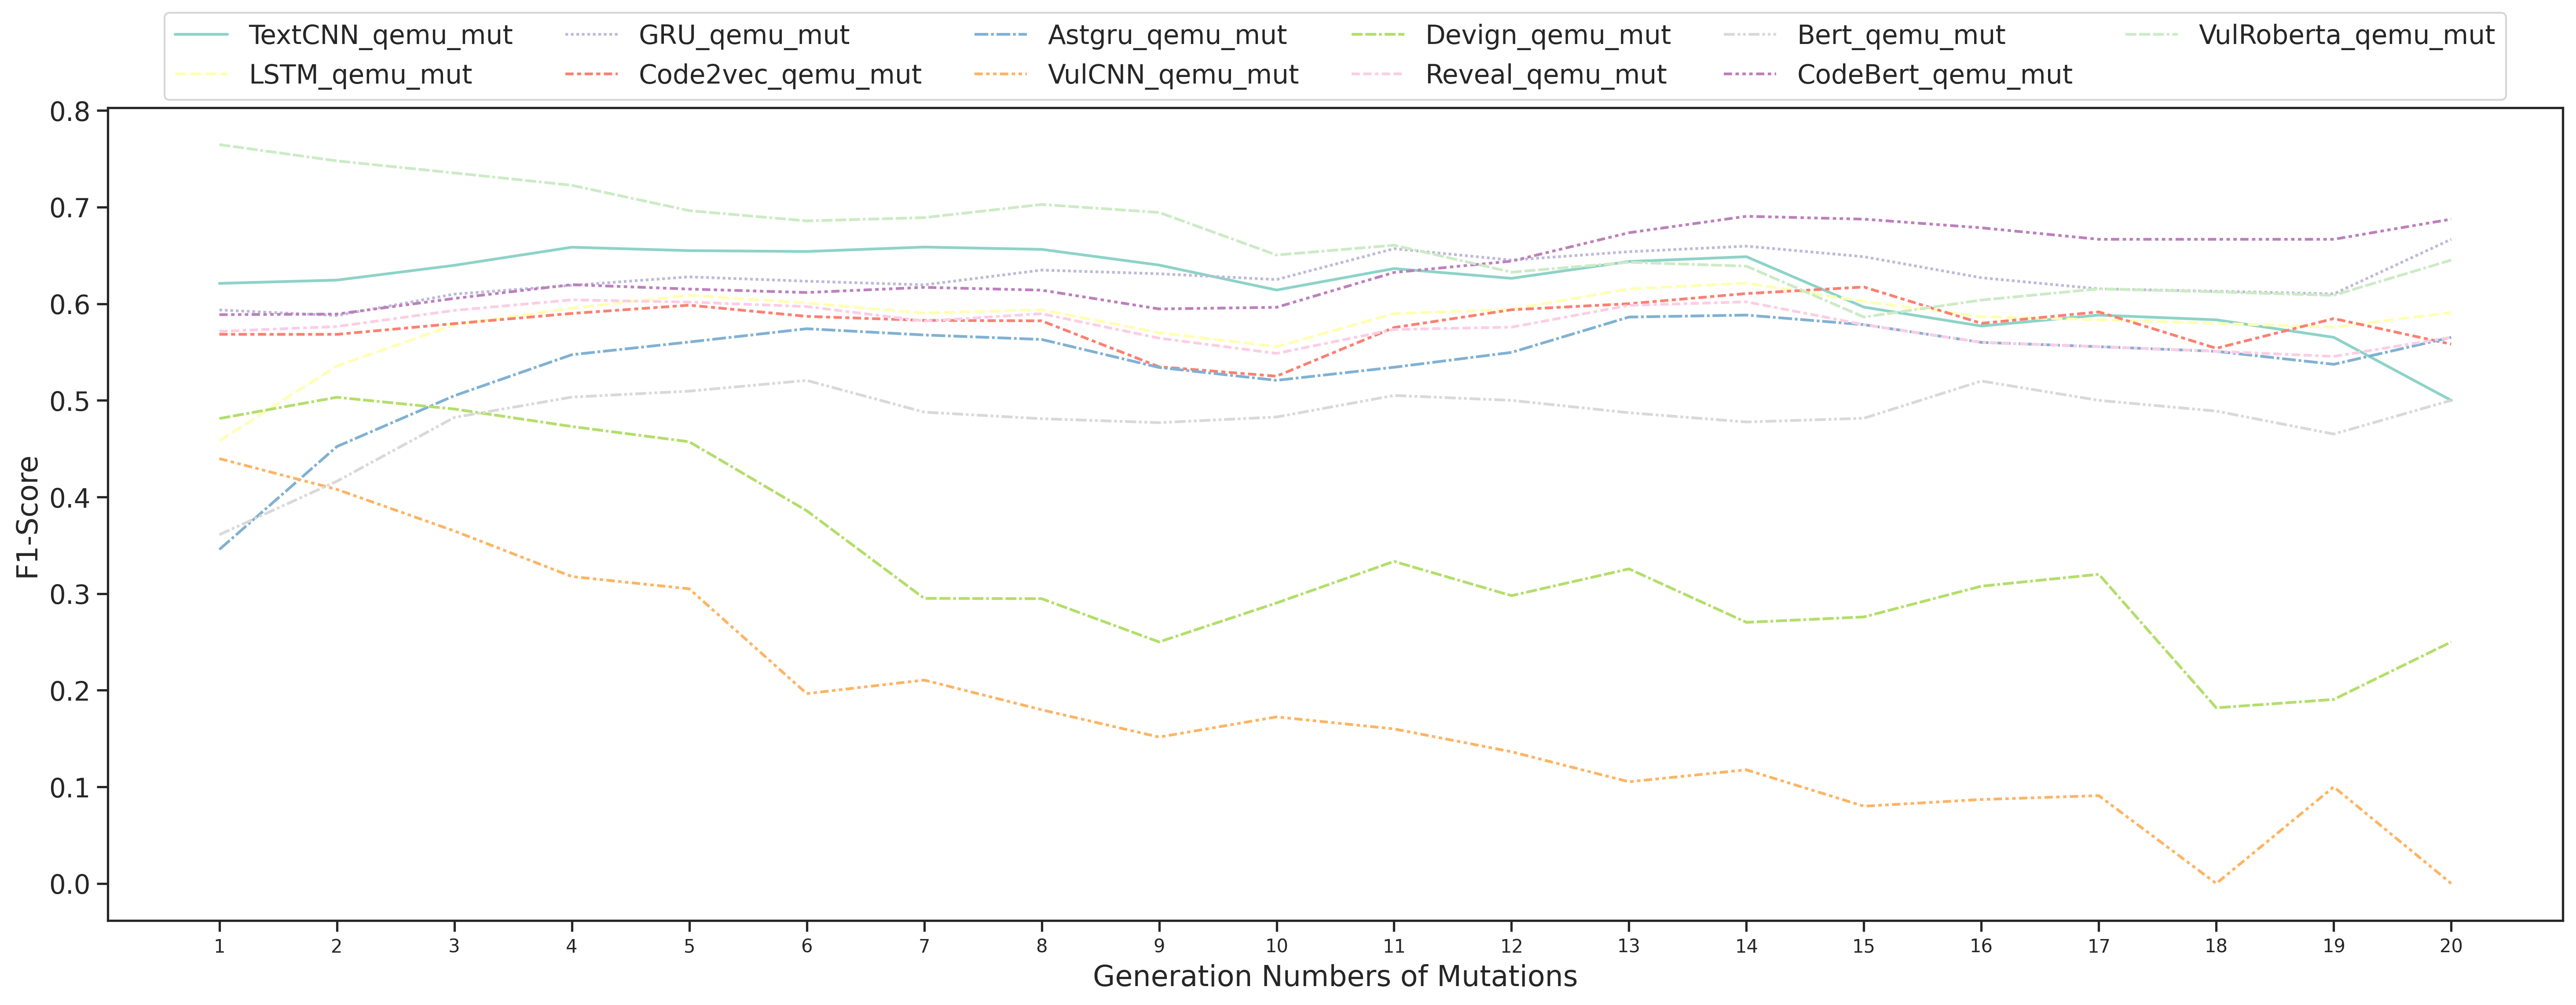

In [157]:
draw_pic(final_all_dict, "qemu")

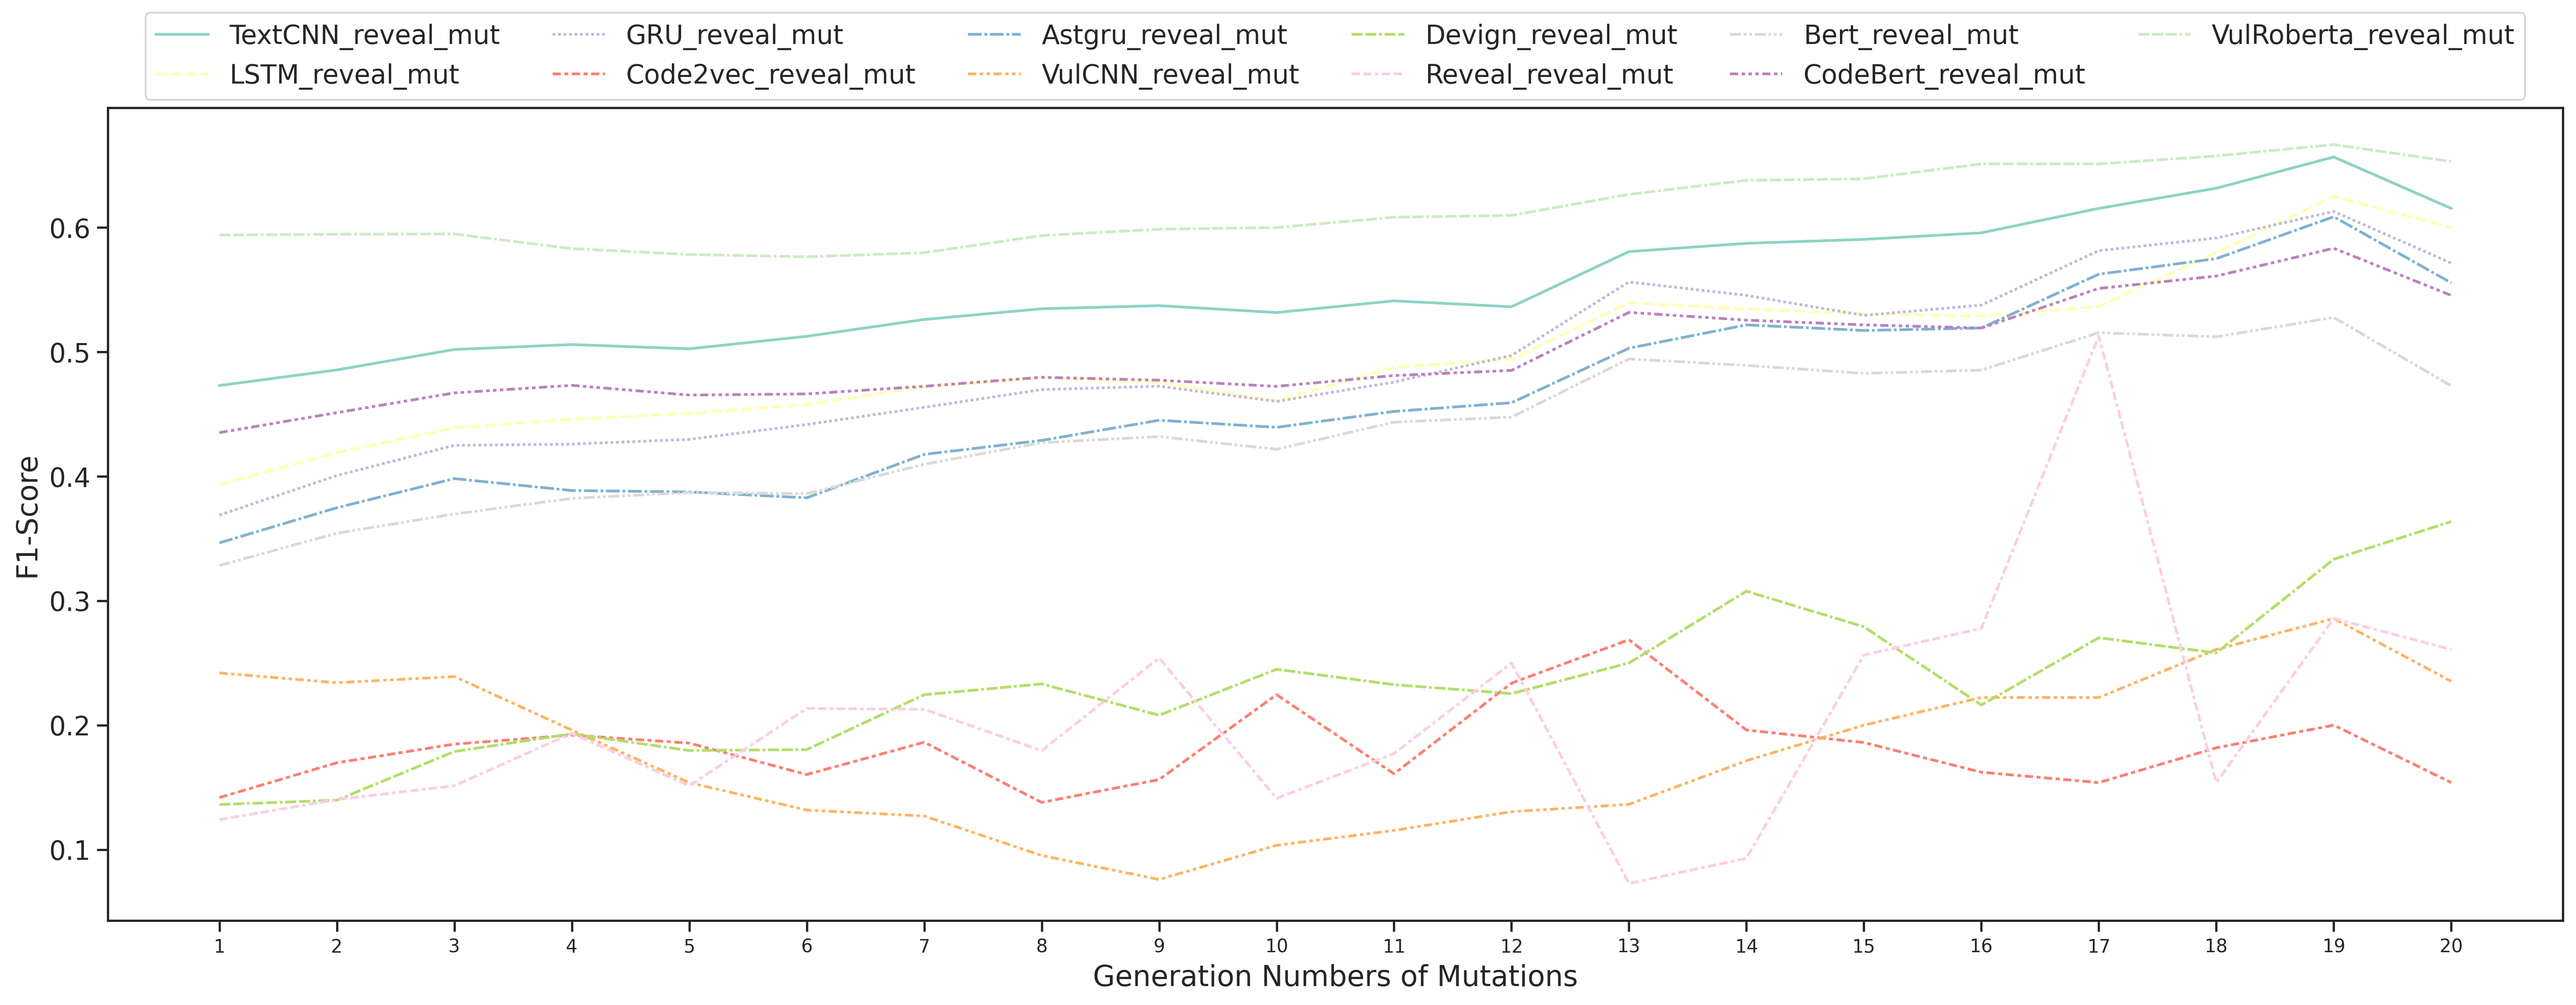

In [158]:
draw_pic(final_all_dict, "reveal")

In [102]:
selected_dataset = "qemu"
aa = final_all_dict[selected_dataset][ [i for i in final_all_dict[selected_dataset].columns if "_mut" in i]]


,TextCNN_qemu_mut,LSTM_qemu_mut,GRU_qemu_mut,Astgru_qemu_mut,VulCNN_qemu_mut,Devign_qemu_mut,Reveal_qemu_mut,Bert_qemu_mut,CodeBert_qemu_mut,VulRoberta_qemu_mut
1,0.621046,0.458201,0.593539,0.345667,0.439693,0.481203,0.571395,0.360991,0.588659,0.764675
2,0.624434,0.535570,0.587784,0.452166,0.407843,0.503169,0.576375,0.416272,0.589296,0.747819
3,0.639735,0.578107,0.609937,0.504755,0.364847,0.491018,0.593074,0.482305,0.605484,0.735338
4,0.658455,0.595392,0.619048,0.547231,0.317673,0.472946,0.603978,0.503347,0.619718,0.722565
5,0.654930,0.608696,0.627803,0.560386,0.304965,0.457143,0.601695,0.509554,0.615156,0.696325
6,0.654054,0.600823,0.623318,0.574118,0.196532,0.385787,0.597077,0.520635,0.611607,0.685714
7,0.658635,0.590361,0.619529,0.567657,0.210526,0.295082,0.582043,0.487805,0.616949,0.689076
8,0.656250,0.593750,0.634783,0.563025,0.179775,0.294737,0.589641,0.481013,0.614035,0.702703
9,0.640000,0.570048,0.631016,0.534031,0.151515,0.250000,0.564356,0.476923,0.594595,0.694444
10,0.614173,0.555556,0.625000,0.520710,0.172414,0.290323,0.548571,0.482759,0.596273,0.650407


In [107]:
# aa["VulCNN_qemu_mut"] = aa["VulCNN_qemu_mut"].apply(lambda x: x.index)
aa["VulCNN_qemu_mut"] = i + aa["VulCNN_qemu_mut"][i] for i in range(len(aa["VulCNN_qemu_mut"] ))
list(aa["VulCNN_qemu_mut"])
list()
aa

,TextCNN_qemu_mut,LSTM_qemu_mut,GRU_qemu_mut,Astgru_qemu_mut,VulCNN_qemu_mut,Devign_qemu_mut,Reveal_qemu_mut,Bert_qemu_mut,CodeBert_qemu_mut,VulRoberta_qemu_mut
1,0.621046,0.458201,0.593539,0.345667,0,0.481203,0.571395,0.360991,0.588659,0.764675
2,0.624434,0.535570,0.587784,0.452166,1,0.503169,0.576375,0.416272,0.589296,0.747819
3,0.639735,0.578107,0.609937,0.504755,2,0.491018,0.593074,0.482305,0.605484,0.735338
4,0.658455,0.595392,0.619048,0.547231,3,0.472946,0.603978,0.503347,0.619718,0.722565
5,0.654930,0.608696,0.627803,0.560386,4,0.457143,0.601695,0.509554,0.615156,0.696325
6,0.654054,0.600823,0.623318,0.574118,5,0.385787,0.597077,0.520635,0.611607,0.685714
7,0.658635,0.590361,0.619529,0.567657,6,0.295082,0.582043,0.487805,0.616949,0.689076
8,0.656250,0.593750,0.634783,0.563025,7,0.294737,0.589641,0.481013,0.614035,0.702703
9,0.640000,0.570048,0.631016,0.534031,8,0.250000,0.564356,0.476923,0.594595,0.694444
10,0.614173,0.555556,0.625000,0.520710,9,0.290323,0.548571,0.482759,0.596273,0.650407


In [11]:
# 获取mut的
true_dict_ori = pd.applymap(lambda x: x["report_dict"]["true_dict"])["CodeBert_ffmpeg"]["ori_qemu"]
false_dict_ori = pd.applymap(lambda x: x["report_dict"]["false_dict"])["CodeBert_ffmpeg"]["ori_qemu"]
true_dict_mut = pd.applymap(lambda x: x["report_dict"]["true_dict"])["CodeBert_ffmpeg"]["mut_qemu"]
false_dict_mut = pd.applymap(lambda x: x["report_dict"]["false_dict"])["CodeBert_ffmpeg"]["mut_qemu"]
set_true_dict_mut = list(set(["_".join(i.split("_")[:-1]) for i in true_dict_mut]))
set_false_dict_mut = list(set(["_".join(i.split("_")[:-1]) for i in false_dict_mut]))
set_mut = list(set(set_true_dict_mut + set_false_dict_mut))
# set_ori = [i for i in set_mut if i in true_dict_ori] + [i for i in set_mut if i in false_dict_ori]


print(len(true_dict_ori), len(false_dict_ori))
print(len(true_dict_mut), len(false_dict_mut))
print(len(set_true_dict_mut),len(set_false_dict_mut))
print(len([i for i in set_mut if i in true_dict_ori]), len([i for i in set_mut if i in false_dict_ori]))
print(len(set_true_dict_mut + set_false_dict_mut), len(set(set_true_dict_mut + set_false_dict_mut))) # 验证有重复！


def get_score(the_true_dict, the_false_dict):
    pre = []
    lab = []
    from model.score import get_MCM_score
    for tt in the_true_dict:
        pre.append(int(tt[0]))
        lab.append(int(tt[0]))
    for tt in the_false_dict:
        pre.append(int(tt[0]))
        lab.append(1 - int(tt[0]))
    get_MCM_score(lab, pre)
false_dict_ori
# get_score(true_dict_ori, false_dict_ori)
# get_score([i for i in set_mut if i in true_dict_ori], [i for i in set_mut if i in false_dict_ori])
# get_score(true_dict, false_dict)
# get_score(set_true_dict, set_false_dict)
# pd.applymap(lambda x: x["report_dict"]["true_dict"]).iloc[0]
# get_MCM_score([0,1,0,0,1],[0,1,0,0,0])

8572 8977
6343 7324
3025 3383
2927 3400
6408 6327


['0_qemu_2028',
 '1_qemu_12157',
 '0_qemu_4546',
 '0_qemu_1220',
 '1_qemu_13826',
 '1_qemu_10296',
 '0_qemu_9644',
 '0_qemu_8269',
 '1_qemu_13232',
 '0_qemu_9354',
 '0_qemu_8594',
 '0_qemu_9538',
 '0_qemu_7898',
 '0_qemu_1918',
 '0_qemu_7358',
 '0_qemu_5298',
 '1_qemu_12136',
 '0_qemu_1189',
 '0_qemu_8688',
 '1_qemu_10326',
 '0_qemu_1830',
 '0_qemu_171',
 '0_qemu_8241',
 '0_qemu_687',
 '0_qemu_578',
 '1_qemu_10254',
 '0_qemu_5668',
 '0_qemu_2611',
 '1_qemu_11126',
 '0_qemu_1233',
 '0_qemu_6132',
 '0_qemu_3969',
 '1_qemu_16717',
 '1_qemu_12998',
 '0_qemu_7394',
 '1_qemu_14998',
 '0_qemu_4218',
 '0_qemu_8549',
 '1_qemu_10899',
 '1_qemu_10334',
 '0_qemu_1697',
 '0_qemu_2064',
 '1_qemu_14804',
 '0_qemu_2883',
 '1_qemu_10437',
 '0_qemu_2538',
 '0_qemu_8448',
 '0_qemu_8552',
 '0_qemu_4829',
 '0_qemu_3484',
 '0_qemu_87',
 '1_qemu_13356',
 '0_qemu_5945',
 '0_qemu_2370',
 '0_qemu_6607',
 '1_qemu_10249',
 '1_qemu_14711',
 '0_qemu_3340',
 '1_qemu_14518',
 '0_qemu_6624',
 '1_qemu_10231',
 '1_qemu_

In [105]:
true_dict_ori = pd.applymap(lambda x: x["report_dict"]["true_dict"])["CodeBert_ffmpeg"]["ori_ffmpeg"]
false_dict_ori = pd.applymap(lambda x: x["report_dict"]["false_dict"])["CodeBert_ffmpeg"]["ori_ffmpeg"]
# true_dict_mut = pd.applymap(lambda x: x["report_dict"]["true_dict"])["CodeBert_ffmpeg"]["mut_qemu"]
# false_dict_mut = pd.applymap(lambda x: x["report_dict"]["false_dict"])["CodeBert_ffmpeg"]["mut_qemu"]
# set_true_dict_mut = list(set(["_".join(i.split("_")[:-1]) for i in true_dict_mut]))
# set_false_dict_mut = list(set(["_".join(i.split("_")[:-1]) for i in false_dict_mut]))
# set_mut = list(set(set_true_dict_mut + set_false_dict_mut))

# shunxu_list = ["TextCNN"]
shunxu_list = ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Devign","Reveal","Bert","CodeBert","VulRoberta"]
aa = []
bb = []
data_name = "qemu"
for the_name in shunxu_list:
    true_dict_ori = pd.applymap(lambda x: x["report_dict"]["true_dict"])[the_name + "_" + data_name ]["ori_" + data_name ]
    false_dict_ori = pd.applymap(lambda x: x["report_dict"]["false_dict"])[the_name + "_" + data_name ]["ori_"+ data_name ]
    true_dict_ori = [i.strip(".c") for i in true_dict_ori]
    false_dict_ori = [i.strip(".c") for i in false_dict_ori]
    aa.append(true_dict_ori + false_dict_ori)
    bb.append([true_dict_ori , false_dict_ori])
    print(len(true_dict_ori), len(false_dict_ori), len(true_dict_ori) + len(false_dict_ori))
all_list = aa[0]
for i in aa:
    all_list = set(all_list).intersection(i)
all_list = list(all_list)
all_length = len(all_list)
for i in range(len(bb)):
    bb[i][0] = list(set(bb[i][0]).intersection(all_list))
    bb[i][1] = list(set(bb[i][1]).intersection(all_list))
    
print("---")
print(len(all_list))
print(len(set(bb[3][0])))
print(len(set(bb[3][1])))
print(len(set(bb[4][0])))
print(len(set(bb[4][1])))

def get_two(all_dataset, all_length, num1, num2):
    return [len(set(all_dataset[num1][0]).difference(bb[num2][0])),
    len(set(all_dataset[num1][0]).intersection(bb[num2][0])),
    len(set(all_dataset[num2][0]).difference(bb[num1][0])),
    all_length - len(set(all_dataset[num2][0]).union(bb[num1][0]))
    ]

def get_three(all_dataset, all_length, num1, num3, num2):
    data_1 = all_dataset[num1][0]
    data_2 = all_dataset[num2][0]
    data_3 = all_dataset[num3][0]
    print(format(len(data_1)/all_length*100, '.1f'), 
    format(len(data_2)/all_length*100, '.1f'), 
    format(len(data_3)/all_length*100, '.1f'), 
    )
    return [len(set(data_1).difference(data_2).difference(data_3)),
    len(set(data_1).intersection(data_2).difference(data_3)),
    len(set(data_1).intersection(data_2).intersection(data_3)),
    len(set(data_1).intersection(data_3).difference(data_2)),
    len(set(data_3).difference(data_1).difference(data_2)),
    len(set(data_3).intersection(data_2).difference(data_1)),
    len(set(data_2).difference(data_1).difference(data_3)),
    all_length - len(set(data_2).union(data_1).union(data_3))]

def get_four(all_dataset, all_length):
    data_1 = set(all_dataset[0][0]).union(all_dataset[1][0]).union(all_dataset[2][0])
    data_2 = set(all_dataset[5][0]).union(all_dataset[6][0]).union(all_dataset[7][0])
    data_3 = set(all_dataset[3][0]).union(all_dataset[4][0])
    data_4 = set(all_dataset[8][0]).union(all_dataset[9][0]).union(all_dataset[10][0])
    print(format(len(data_1)/all_length*100, '.1f'), 
    format(len(data_2)/all_length*100, '.1f'), 
    format(len(data_3)/all_length*100, '.1f'), 
    format(len(data_4)/all_length*100, '.1f'), 
    )

    return [len(set(data_1).difference(data_2).difference(data_3).difference(data_4)),
    len(set(data_1).intersection(data_3).difference(data_2).difference(data_4)),
    len(set(data_1).intersection(data_3).intersection(data_2).difference(data_4)),
    len(set(data_1).intersection(data_2).difference(data_3).difference(data_4)),
    len(set(data_1).intersection(data_4).intersection(data_2).difference(data_3)),
    len(set(data_1).intersection(data_4).intersection(data_2).intersection(data_3)),
    len(set(data_1).intersection(data_4).intersection(data_3).difference(data_2)),
    len(set(data_1).intersection(data_4).difference(data_2).difference(data_3)),
    len(set(data_4).difference(data_2).difference(data_3).difference(data_1)),
    len(set(data_4).intersection(data_3).difference(data_1).difference(data_2)),
    len(set(data_4).intersection(data_3).intersection(data_2).difference(data_1)),
    len(set(data_4).intersection(data_2).difference(data_1).difference(data_3)),
    len(set(data_2).difference(data_1).difference(data_3).difference(data_4)),
    len(set(data_2).intersection(data_3).difference(data_1).difference(data_4)),
    len(set(data_3).difference(data_1).difference(data_2).difference(data_4)),
    all_length - len(set(data_2).union(data_1).union(data_3).union(data_4))]

print("----")
rr = []
rr.append([format(i/all_length*100, '.1f') for i in get_two(bb,all_length, 3,4)])
rr.append([format(i/all_length*100, '.1f') for i in get_three(bb,all_length, 0,1,2)])
rr.append([format(i/all_length*100, '.1f') for i in get_three(bb,all_length, 5,6,7)])
rr.append([format(i/all_length*100, '.1f') for i in get_three(bb,all_length, 8,9,10)])
rr.append([format(i/all_length*100, '.1f') for i in get_four(bb,all_length)])


for i in rr:
    print(i)
    sum = 0
    for j in i:
        sum += float(j)
    print(sum)


1200 555 1755
971 784 1755
963 792 1755
8499 9017 17516
951 739 1690
1478 236 1714
865 603 1468
638 830 1468
1025 730 1755
1017 738 1755
1505 250 1755
---
1438
701
737
794
644
----
68.2 54.0 54.0
87.7 42.5 59.5
57.0 84.6 55.0
92.6 98.5 88.7 96.3
['33.5', '15.2', '40.0', '11.3']
100.0
['6.4', '25.9', '19.4', '16.6', '15.6', '2.4', '6.3', '7.4']
100.0
['7.9', '24.8', '10.0', '45.1', '3.1', '1.3', '6.4', '1.5']
100.10000000000001
['7.7', '22.9', '24.2', '2.2', '1.8', '26.8', '10.6', '3.7']
99.89999999999999
['0.0', '0.1', '1.4', '0.3', '7.4', '82.5', '0.9', '0.0', '0.1', '0.1', '3.0', '2.2', '1.2', '0.6', '0.2', '0.0']
100.0


In [78]:
a = [1, 2, 3, 4]
b = [3, 4, 5, 6]
print(set(a).difference(b))

{1, 2}


In [125]:
#时间评价
# the_name = "reveal"
# pd.applymap(lambda x: x["time"])[[i+"_"+the_name for i in shunxu_list]]

shunxu_list = ["TextCNN","LSTM","GRU","Code2vec","Astgru","VulCNN","Devign","Reveal","Bert","CodeBert","VulRoberta"]
aa = pandas.DataFrame()
for the_name in ["ffmpeg", "qemu", "reveal"]:
        bb = pd.applymap(lambda x: [ 
            float(x["time"]) ,len(x["report_dict"]["true_dict"]) + len(x["report_dict"]["false_dict"]) 
            ])[[i+"_"+the_name for i in shunxu_list]].loc[["ori_"+the_name]]
        bb.columns = shunxu_list
        aa = pandas.concat([aa, bb], axis=0, ignore_index=True)
aa.applymap(lambda x:x[0]/x[1] *1000)

,TextCNN,LSTM,GRU,Code2vec,Astgru,VulCNN,Devign,Reveal,Bert,CodeBert,VulRoberta
0,1.650972,3.538383,3.925281,4.540582,3.377574,0.653802,9.758025,0.166667,10.187308,5.119754,0.436029
1,1.111111,3.398291,3.655840,2.296472,3.340828,0.432322,8.074932,0.166213,6.381197,4.528205,0.410256
2,0.736535,2.986086,3.272442,2.321623,3.212417,0.483657,7.979206,0.176434,7.046230,4.688510,0.407540
